In [1]:
import pandas as pd

train =  pd.read_csv('processed_train.csv')
test = pd.read_csv('processed_test.csv')
train

,Unnamed: 0,Age,Fare,Survived,fam_freq,female,1,2,C,Q
0,0,2,0,0.0,1,1.0,0.0,1.0,0.0,1.0
1,1,7,11,1.0,1,0.0,0.0,0.0,0.0,0.0
2,2,4,3,1.0,0,0.0,0.0,1.0,0.0,1.0
3,3,7,10,1.0,1,0.0,0.0,0.0,0.0,1.0
4,4,7,3,0.0,0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,886,5,5,0.0,0,1.0,1.0,0.0,0.0,1.0
887,887,1,9,1.0,0,0.0,0.0,0.0,0.0,1.0
888,888,2,8,0.0,1,0.0,0.0,1.0,0.0,1.0
889,889,4,9,1.0,0,1.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train.Survived)


In [148]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.regularizers import l2

In [162]:
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(8, activation='linear', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 0s 5ms/step - loss: 89.9072 - accuracy: 0.6153 - val_loss: 76.1195 - val_accuracy: 0.6143
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 56.1408 - accuracy: 0.6153 - val_loss: 41.8897 - val_accuracy: 0.6143
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 24.6226 - accuracy: 0.6153 - val_loss: 9.3830 - val_accuracy: 0.6099
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 3.3868 - accuracy: 0.5180 - val_loss: 2.8578 - val_accuracy: 0.6054
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 1.8290 - accuracy: 0.5269 - val_loss: 1.1662 - val_accuracy: 0.5964
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.9834 - accuracy: 0.4626 - val_loss: 0.9263 - val_accuracy: 0.5516
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8765 - accuracy: 0.4925 - val_loss: 0.9041 - val_accuracy: 0.3318
Epoch 8/

Epoch 59/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6542 - val_loss: 0.6946 - val_accuracy: 0.6547
Epoch 60/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.6228 - val_loss: 0.6714 - val_accuracy: 0.6547
Epoch 61/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.6317 - val_loss: 0.6453 - val_accuracy: 0.6637
Epoch 62/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.5958 - val_loss: 0.8151 - val_accuracy: 0.5247
Epoch 63/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6317 - val_loss: 0.7150 - val_accuracy: 0.6457
Epoch 64/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7901 - accuracy: 0.5883 - val_loss: 0.8909 - val_accuracy: 0.4978
Epoch 65/100
21/21 [==============================] - 0s 1ms/step - loss: 0.9519 - accuracy: 0.5599 - val_loss: 0.7200 - val_accuracy: 0.6009
Epoch 

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test, batch_size=32).round()))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82       137
         1.0       0.77      0.55      0.64        86

    accuracy                           0.76       223
   macro avg       0.76      0.72      0.73       223
weighted avg       0.76      0.76      0.75       223



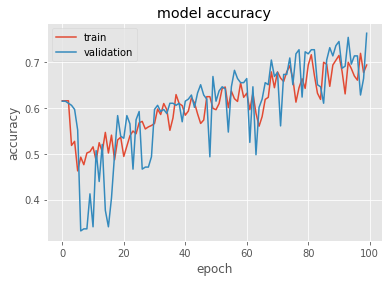

In [164]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [165]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 545us/step - loss: 0.5817 - accuracy: 0.7623


[0.5817309617996216, 0.7623318433761597]

In [153]:
model.fit(train.drop('Survived', axis=1), train.Survived)
preds = model.predict(test, batch_size=32).round()
preds = preds.reshape((-1, ))
print(preds.shape)
preds = pd.Series(preds)
t = pd.read_csv('test.csv')
final = pd.concat([t['PassengerId'], preds], axis=1)
final.columns = ['PassengerId', 'Survived']
final

28/28 [==============================] - 0s 771us/step - loss: 0.5575 - accuracy: 0.7800
(418,)


,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [143]:
final.to_csv('Neural_Network.csv', index=False)